In [1]:
import tensorflow as tf

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
# import the necessary packages
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((x_train, y_train), (x_test, y_test)) = mnist.load_data()
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

[INFO] accessing MNIST...
11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(len(x_train))
print(len(x_test))

60000
10000


In [5]:
# convert the labels from integers to vectors
le = LabelBinarizer()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [6]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = Adam(lr=0.001)

width=28
height=28
depth=1
classes=10

[INFO] compiling model...


In [7]:
print(K.image_data_format())

channels_last


In [8]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GlobalAveragePooling2D

# initialize the model
model = Sequential()
inputShape = (height, width, depth)

# if we are using "channels first", update the input shape
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)

# first set of CONV => RELU => POOL layers
model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# second set of CONV => RELU => POOL layers
model.add(Conv2D(64, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# first (and only) set of FC => RELU layers
#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(500))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0

In [10]:
# train the network
print("[INFO] training network...")
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=20, verbose=1)

[INFO] training network...
Epoch 1/20
469/469 [==============================] - 5s 11ms/step - loss: 0.5303 - accuracy: 0.8234 - val_loss: 0.1571 - val_accuracy: 0.9549
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1327 - accuracy: 0.9596 - val_loss: 0.0929 - val_accuracy: 0.9709
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0969 - accuracy: 0.9707 - val_loss: 0.0667 - val_accuracy: 0.9785
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0728 - accuracy: 0.9779 - val_loss: 0.0552 - val_accuracy: 0.9819
Epoch 5/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0617 - accuracy: 0.9813 - val_loss: 0.0397 - val_accuracy: 0.9871
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0522 - accuracy: 0.9838 - val_loss: 0.0398 - val_accuracy: 0.9868
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.

In [11]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x_test)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in le.classes_]))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.96      0.98       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.95      1.00      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



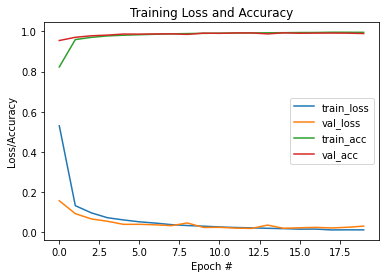

In [12]:
# plot the training loss and accuracy
#plt.style.use("ggplot")
%matplotlib inline
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()